In [1]:
# Loading Dataset
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic').drop(columns=['parch', 'deck', 'alive'])
df.head()

survived  pclass     sex   age  sibsp     fare embarked  class    who  \
0         0       3    male  22.0      1   7.2500        S  Third    man   
1         1       1  female  38.0      1  71.2833        C  First  woman   
2         1       3  female  26.0      0   7.9250        S  Third  woman   
3         1       1  female  35.0      1  53.1000        S  First  woman   
4         0       3    male  35.0      0   8.0500        S  Third    man   

   adult_male  embark_town  alone  
0        True  Southampton  False  
1       False    Cherbourg  False  
2       False  Southampton   True  
3       False  Southampton  False  
4        True  Southampton   True

In [2]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop(columns='survived')
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

def preprocessing(X):
    categorical_features = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('ordinal', 
             OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
             categorical_features)
        ],
        remainder='passthrough'
    )
    
    return preprocessor.fit_transform(X)

X_train = pd.DataFrame(preprocessing(X_train), columns = X_train.columns)
X_train.head()

pclass  sex  age  sibsp  fare  embarked  class  who  adult_male  \
0     1.0  2.0  0.0    1.0   1.0       2.0    1.0  1.0        45.5   
1     1.0  2.0  1.0    1.0   1.0       2.0    1.0  2.0        23.0   
2     1.0  2.0  2.0    1.0   1.0       2.0    1.0  3.0        32.0   
3     1.0  2.0  2.0    1.0   1.0       2.0    0.0  3.0        26.0   
4     0.0  2.0  2.0    0.0   0.0       2.0    0.0  3.0         6.0   

   embark_town    alone  
0          0.0  28.5000  
1          0.0  13.0000  
2          0.0   7.9250  
3          1.0   7.8542  
4          4.0  31.2750

In [ ]:
# Training without pruning
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_no_pruned = DecisionTreeClassifier() # default parameters
model_no_pruned.fit(X_train, y_train)

DecisionTreeClassifier()

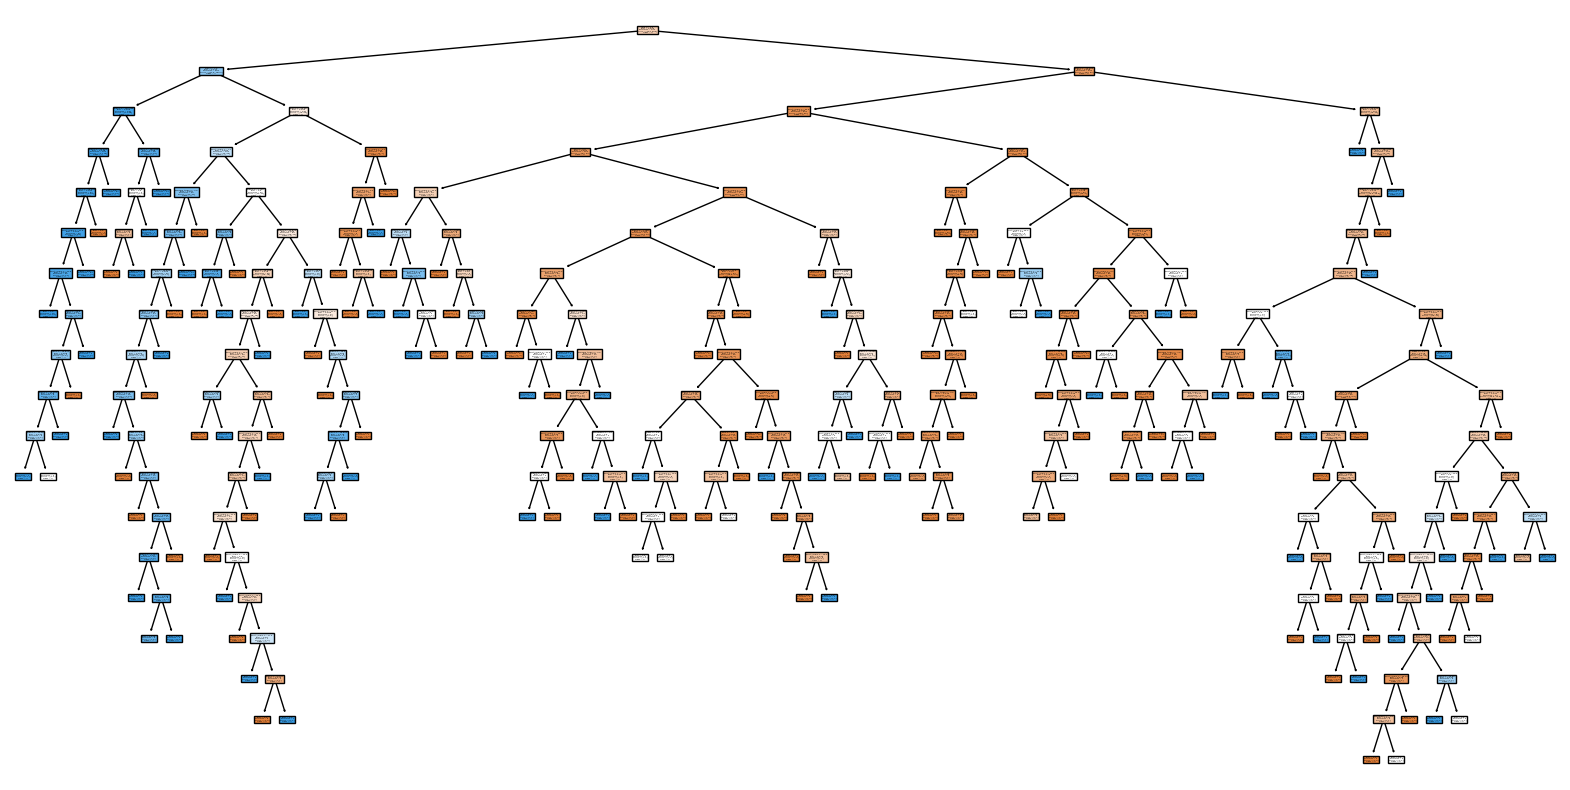

In [6]:
# Plot the decision tree
import matplotlib.pyplot as plt

def plot_decision_tree(model):
    plt.figure(figsize=(20, 10))
    plot_tree(model, filled=True, feature_names=X_train.columns, class_names=y_train.astype(str).unique())
    plt.show()

plot_decision_tree(model_no_pruned)

In [ ]:
# Model Testing
from sklearn.metrics import f1_score

X_test = pd.DataFrame(preprocessing(X_test), columns = X_train.columns)
y_pred = model_no_pruned.predict(X_test)
f1_score(y_test, y_pred)

0.7083333333333334

In [8]:
# Pre Pruning
model_pre_pruned = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    max_leaf_nodes=20,
    class_weight='balanced',
    random_state=42,
    # min_impurity_decrease = 0.005 - carefully handle this hyperparameter
)

model_pre_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', max_leaf_nodes=20,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

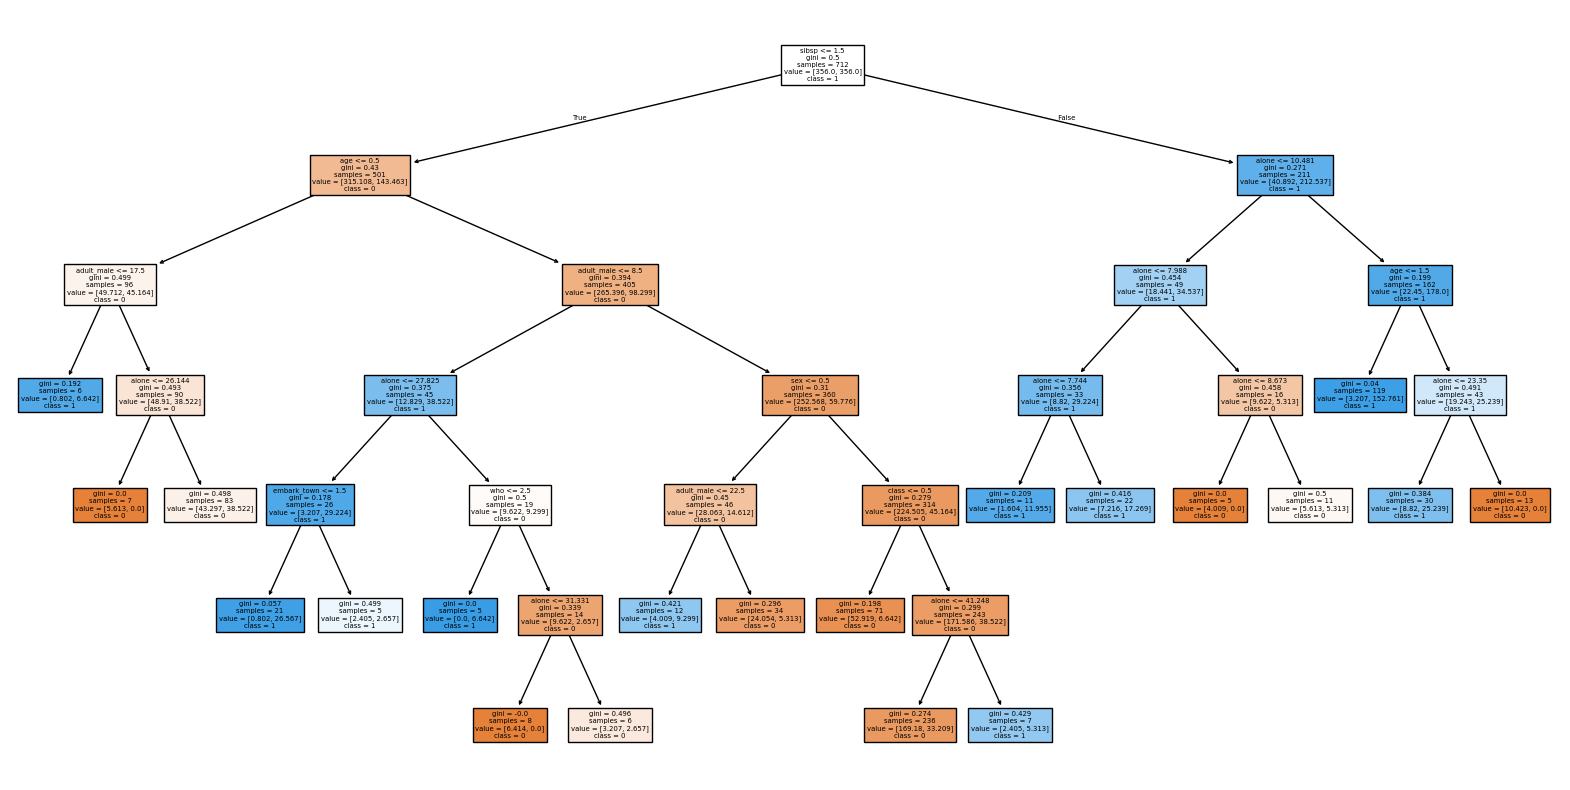

In [9]:
# Plot the decision tree
plot_decision_tree(model_pre_pruned)
plt.show()

In [ ]:
# Model Evaluation
y_pred = model_pre_pruned.predict(X_test)
f1_score(y_test, y_pred)

0.7375886524822695

In [10]:
# Post Pruning
model_post_pruned = DecisionTreeClassifier(
    ccp_alpha=0.005
)

model_post_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005)

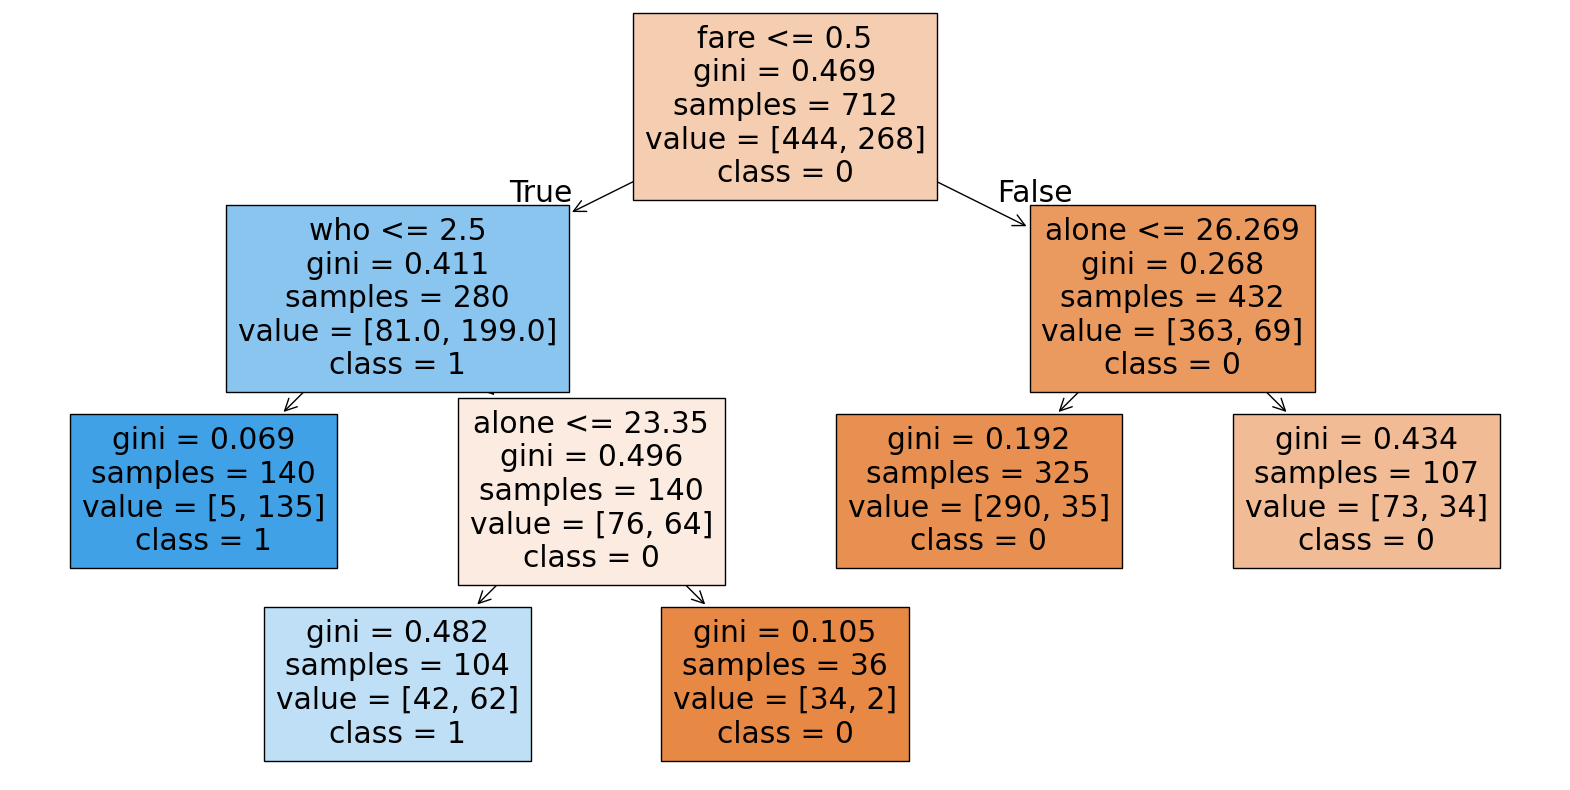

In [11]:
# Plot the decision tree
plot_decision_tree(model_post_pruned)

In [12]:
# Model Evaluation
y_pred = model_post_pruned.predict(X_test)
f1_score(y_test, y_pred)

0.7571428571428571